In [2]:
# Fraud-Detection-In-Transaction_EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading Datasets
df= pd.read_csv('./data/synthetic_fraud_dataset.csv')
print("Dataset Uploaded Sucessfully")

Dataset Uploaded Sucessfully


In [4]:
# Summary of Datasets
print("Dataset Shape : ",df.shape)
print("\n Columns: ", df.columns)
print("\n Info: ")
print(df.info())
print("\n Summary Stats: ")
df.describe()

Dataset Shape :  (50000, 21)

 Columns:  Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

 Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Time

,Transaction_Amount,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [5]:
# Analyzing Null Values
print("Null Values : \n",df.isna().sum())

Null Values : 
 Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64



Fraud Class Distribution:
 Fraud_Label
0    33933
1    16067
Name: count, dtype: int64


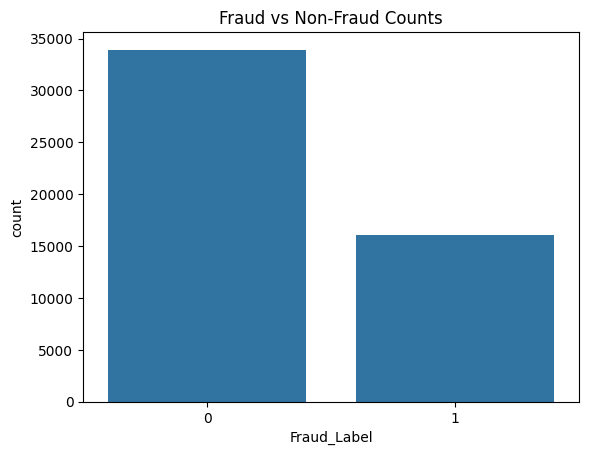

In [6]:
# Check class balance
print("\nFraud Class Distribution:\n", df['Fraud_Label'].value_counts())
sns.countplot( data=df , x='Fraud_Label')
plt.title("Fraud vs Non-Fraud Counts")
plt.show()

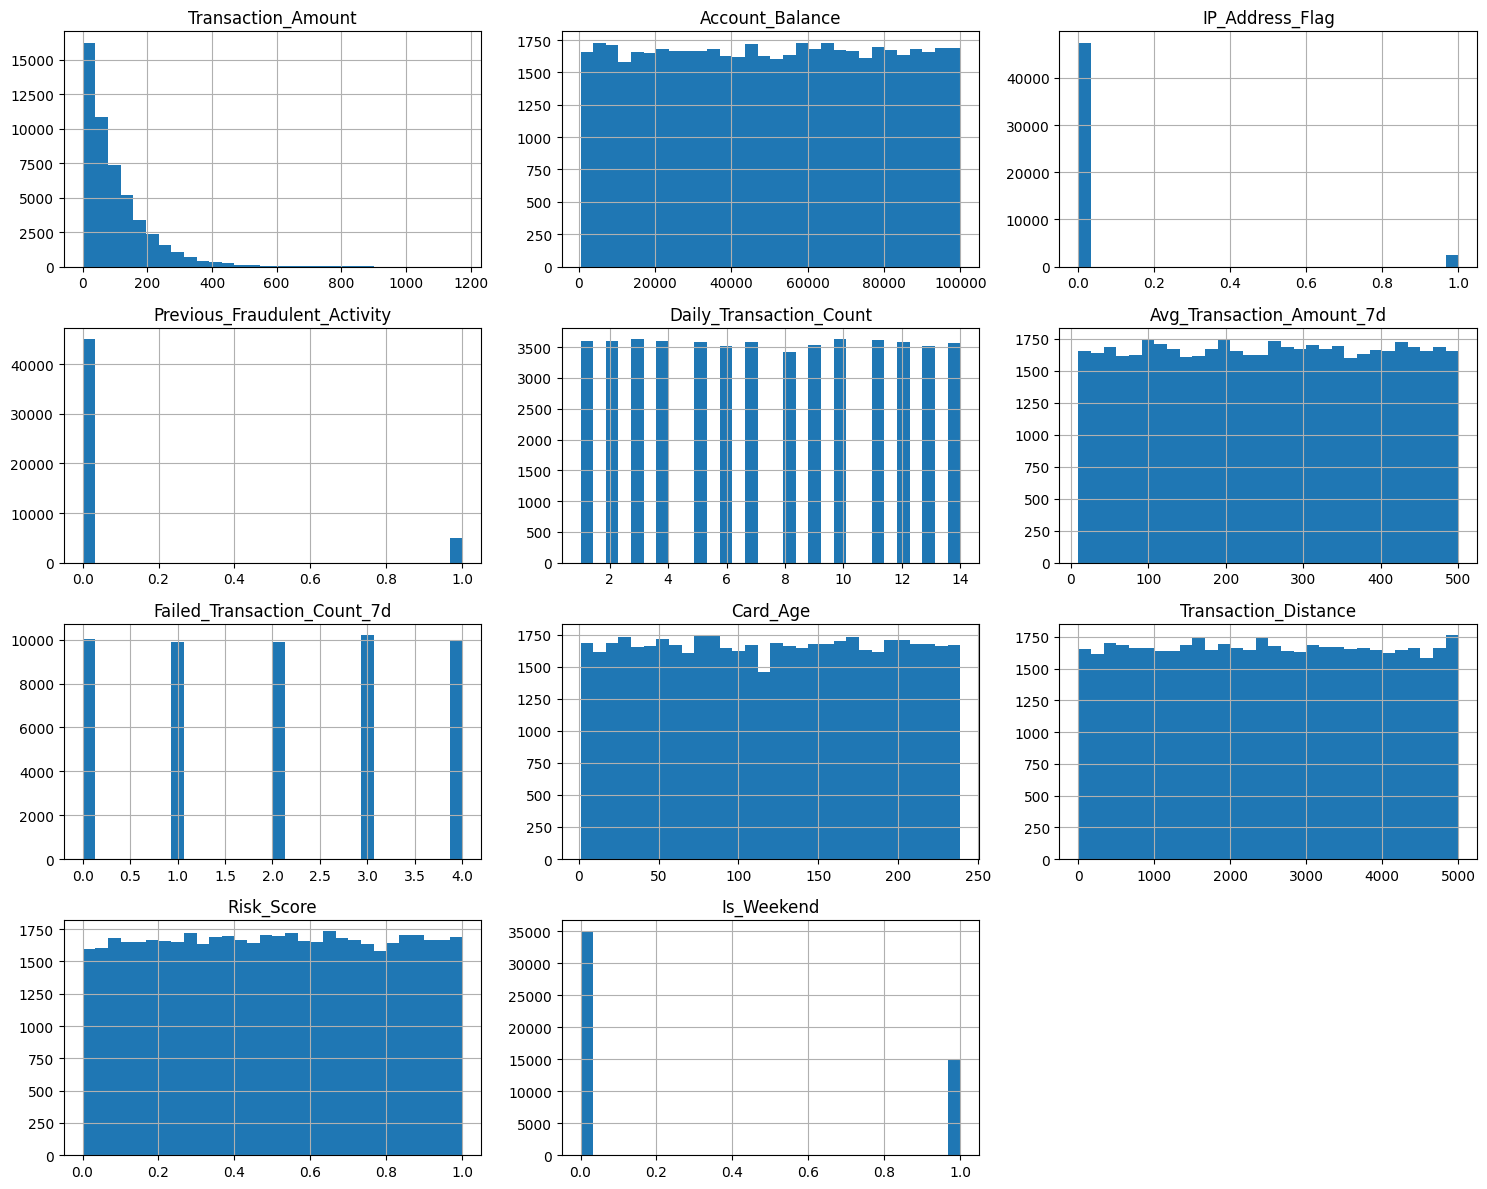

In [7]:
# Visualize numerical feature distributions
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(['Fraud_Label'])
df[num_cols].hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

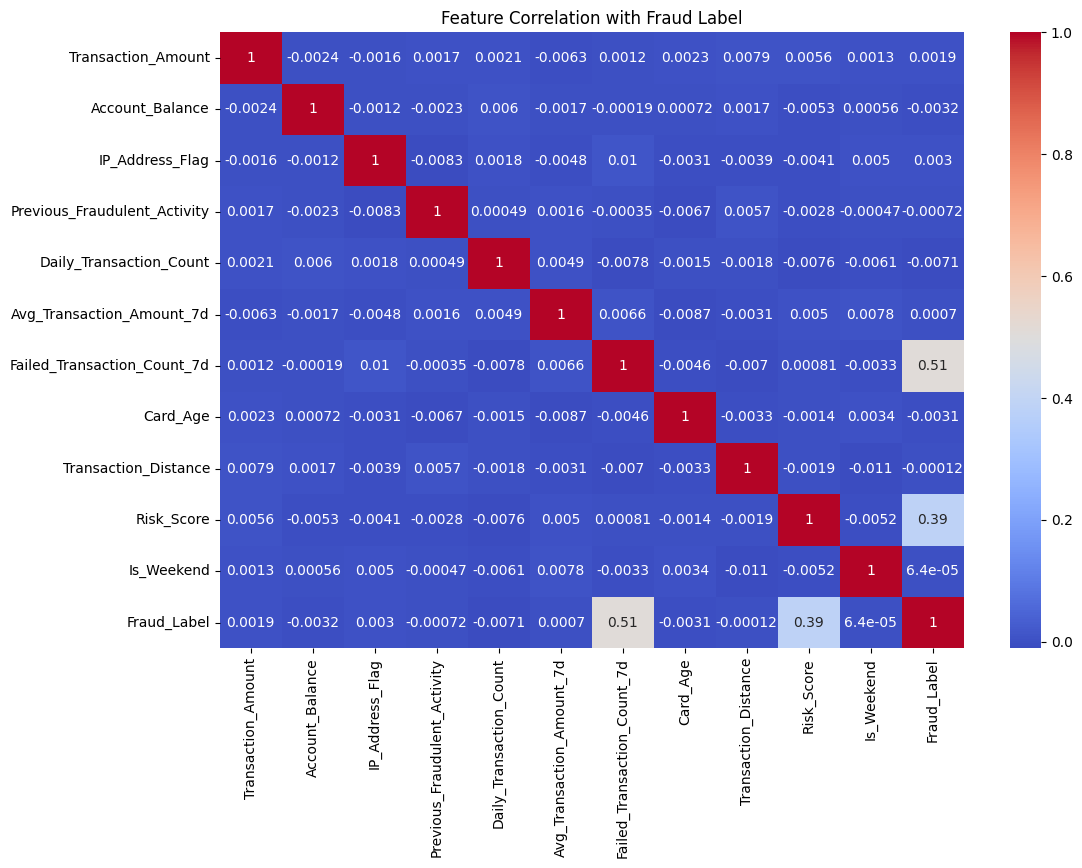

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols.tolist() + ['Fraud_Label']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Fraud Label")
plt.show()

In [9]:
# Drop unnecessary columns
# df = df.drop(columns=['Transaction_ID', 'User_ID', 'Timestamp'])
df = df.drop(columns=['Transaction_ID', 'User_ID', 'Timestamp'], errors='ignore')

In [10]:
# Separate features and target
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Identify categorical and numerical columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Fit and transform training data
X_train_processed = preprocessor.fit_transform(X_train)
# Transform test data
X_test_processed = preprocessor.transform(X_test)

#Train logistic regression
lr_model=LogisticRegression()
lr_model.fit(X_train_processed, y_train)
lr_pred = lr_model.predict(X_test_processed)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_processed, y_train)
dt_pred = dt.predict(X_test_processed)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

# Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
xgb.fit(X_train_processed, y_train)
xgb_pred = xgb.predict(X_test_processed)

print("\nXGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


Logistic Regression Accuracy: 0.802
[[7446 1037]
 [1438 2579]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      8483
           1       0.71      0.64      0.68      4017

    accuracy                           0.80     12500
   macro avg       0.78      0.76      0.77     12500
weighted avg       0.80      0.80      0.80     12500


Decision Tree Accuracy: 1.0
[[8483    0]
 [   0 4017]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8483
           1       1.00      1.00      1.00      4017

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:53:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.99928
[[8477    6]
 [   3 4014]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8483
           1       1.00      1.00      1.00      4017

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



In [15]:
# #Hyperparameter Tuning & Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [16]:
# # Pipeline for Decision Tree
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

In [17]:
# # Parameters for Decision Tree 
dt_params = {
    'dt__max_depth': [3, 5, 10],
    'dt__min_samples_split': [2, 5],
}

# Parameters for XGBoost 
xgb_params = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.01, 0.1],
}

In [18]:
# Decision Tree Tuning
grid_dt = GridSearchCV(dt_pipeline, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train_processed, y_train)

# XGBoost Tuning
grid_xgb = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_processed, y_train)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [16:55:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_poli...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1],
                         'xgb__max_depth': [3, 5],
                         'xgb__n_estimators': [100, 200]},
             scoring='accuracy')

In [20]:

# Evaluating Decision Tree
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_processed)
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Evaluating XGBoost
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_processed)
print("\nXGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Decision Tree Results:
[[8483    0]
 [   0 4017]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8483
           1       1.00      1.00      1.00      4017

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500

Accuracy: 1.0

XGBoost Results:
[[8477    6]
 [   0 4017]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8483
           1       1.00      1.00      1.00      4017

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500

Accuracy: 0.99952


In [23]:
# Saving the best XGBoost model and preprocessor
joblib.dump(best_dt, 'dt_fraud_model.pkl')
print("Model saved as 'dt_fraud_model.pkl'")
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Preprocessor saved as 'preprocessor.pkl'")


Model saved as 'dt_fraud_model.pkl'
Preprocessor saved as 'preprocessor.pkl'
